<a href="https://colab.research.google.com/github/jsasisekaran/SVM-machine-learning-model-on-twitter-data/blob/main/svm_it_emo_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
data = pd.read_csv("file.csv", encoding='latin-1')
print(data)

                                                   text   Emotion Sentiment  \
0        andare a ricercare di continuo comunque que...     anger  negative   
1        bisogna spegnere il pi possibile l epidemia...     anger  negative   
2        dare ascolto ad una  a palesemente in mala ...     anger  negative   
3        finch ne dimostra meno non gli serve il gre...     anger  negative   
4        girano queste cose terroristiche si potrebb...     anger  negative   
...                                                 ...       ...       ...   
9934  vorrei sapere da dove nascono ste fregnacce de...     anger  negative   
9935  webinar su nuove risposte sulla demenza dal lo...      fear  negative   
9936  x giustificare il vaccino ai bimbi che in larg...     anger  negative   
9937  xii congresso simit caltanissetta il primario ...   sadness  negative   
9938  zangrillo la manifestazione pi grave e pericol...      fear  negative   

      recode_emotion  recode_sentiment  Total  
0  

In [ ]:
data = data.copy()
print(data)

                                                   text   Emotion Sentiment  \
0        andare a ricercare di continuo comunque que...     anger  negative   
1        bisogna spegnere il pi possibile l epidemia...     anger  negative   
2        dare ascolto ad una  a palesemente in mala ...     anger  negative   
3        finch ne dimostra meno non gli serve il gre...     anger  negative   
4        girano queste cose terroristiche si potrebb...     anger  negative   
...                                                 ...       ...       ...   
9934  vorrei sapere da dove nascono ste fregnacce de...     anger  negative   
9935  webinar su nuove risposte sulla demenza dal lo...      fear  negative   
9936  x giustificare il vaccino ai bimbi che in larg...     anger  negative   
9937  xii congresso simit caltanissetta il primario ...   sadness  negative   
9938  zangrillo la manifestazione pi grave e pericol...      fear  negative   

      recode_emotion  recode_sentiment  Total  
0  

In [ ]:
data_clean = data.copy()
data_clean['S'] = data_clean['Total'].\
    apply(lambda x: 1 if x>0 else -1 if x<0 else 0)

data_clean['text'] = data_clean['text'].apply(lambda x: BeautifulSoup(x, "lxml").text)

In [ ]:
from typing import ValuesView
data_clean.head()
ValuesView(data_clean)
print(data_clean)
(data_clean)

a = data_clean.to_csv('data.csv')   

                                                   text   Emotion Sentiment  \
0     andare a ricercare di continuo comunque quello...     anger  negative   
1     bisogna spegnere il pi possibile l epidemia no...     anger  negative   
2     dare ascolto ad una  a palesemente in mala fed...     anger  negative   
3     finch ne dimostra meno non gli serve il green ...     anger  negative   
4     girano queste cose terroristiche si potrebbe f...     anger  negative   
...                                                 ...       ...       ...   
9934  vorrei sapere da dove nascono ste fregnacce de...     anger  negative   
9935  webinar su nuove risposte sulla demenza dal lo...      fear  negative   
9936  x giustificare il vaccino ai bimbi che in larg...     anger  negative   
9937  xii congresso simit caltanissetta il primario ...   sadness  negative   
9938  zangrillo la manifestazione pi grave e pericol...      fear  negative   

      recode_emotion  recode_sentiment  Total  S  


In [ ]:
train, test = train_test_split(data_clean, test_size=0.30, random_state=1)
X_train = train['text'].values
X_test = test['text'].values
y_train = train['S']
y_test = test['S']

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import nltk
nltk.download('stopwords')


def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

en_stopwords = set(stopwords.words("italian")) 

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = en_stopwords)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data_clean['text'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  88.26291079812206


[[2621    0    0]
 [ 141    3    0]
 [ 209    0    8]]


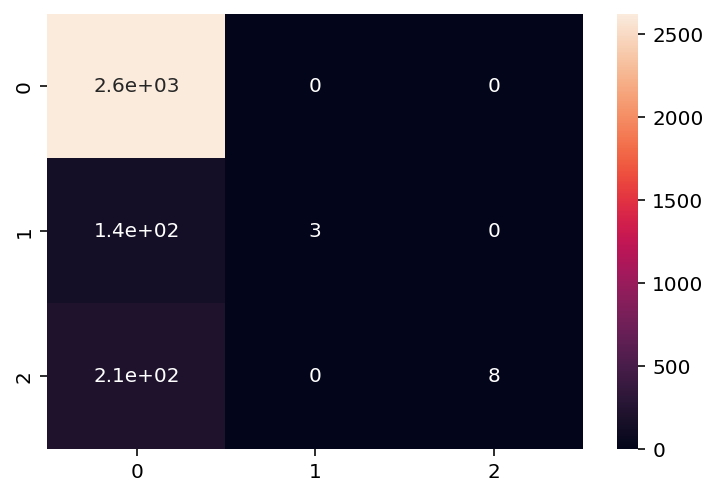

In [ ]:
# importing seaborn
import seaborn as sns

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# providing actual and predicted values
cm = confusion_matrix(y_test, predictions_NB)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)

# saving confusion matrix in png form
plt.savefig('confusion_Matrix.png')
print(cm)

In [ ]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, predictions_NB))

              precision    recall  f1-score   support

          -1       0.88      1.00      0.94      2621
           0       1.00      0.02      0.04       144
           1       1.00      0.04      0.07       217

    accuracy                           0.88      2982
   macro avg       0.96      0.35      0.35      2982
weighted avg       0.90      0.88      0.83      2982



In [ ]:
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import GridSearchCV

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)



SVM Accuracy Score ->  87.89403085177733


[[2621    0    0]
 [ 144    0    0]
 [ 217    0    0]]


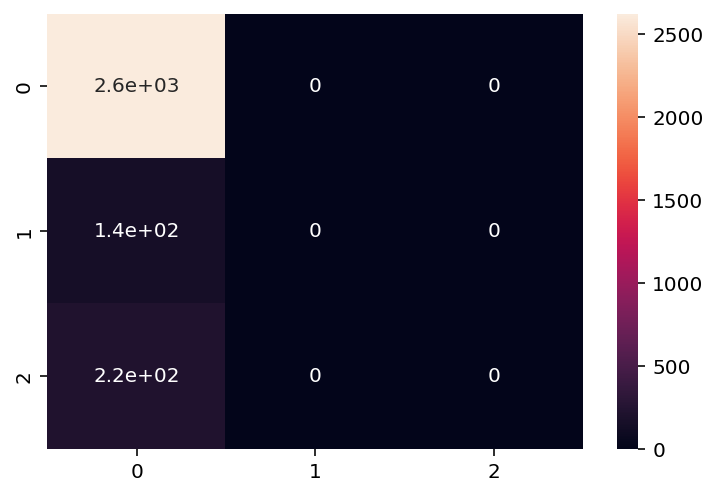

In [ ]:
# importing seaborn
import seaborn as sns

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# providing actual and predicted values
cm = confusion_matrix(y_test, predictions_SVM)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)

# saving confusion matrix in png form
plt.savefig('confusion_Matrix.png')
print(cm)

In [ ]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

          -1       0.88      1.00      0.94      2621
           0       0.00      0.00      0.00       144
           1       0.00      0.00      0.00       217

    accuracy                           0.88      2982
   macro avg       0.29      0.33      0.31      2982
weighted avg       0.77      0.88      0.82      2982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
